In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
import math as mt

In [2]:
data=pd.read_csv('data1.csv')

In [3]:
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,6
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,7
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,8
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,9


**Let us handle the outlier in two ways and analyse :**

*1. Remove the outliers*

*2. log normalise the data to shrink the outliers or box cox*

In [4]:
# Remove the outliers
cont_features=[]
for x in data.columns:
    if len(data[x].unique())>55:
        cont_features.append(x)
print(f'Continuous Features are : {cont_features}')


Continuous Features are : ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


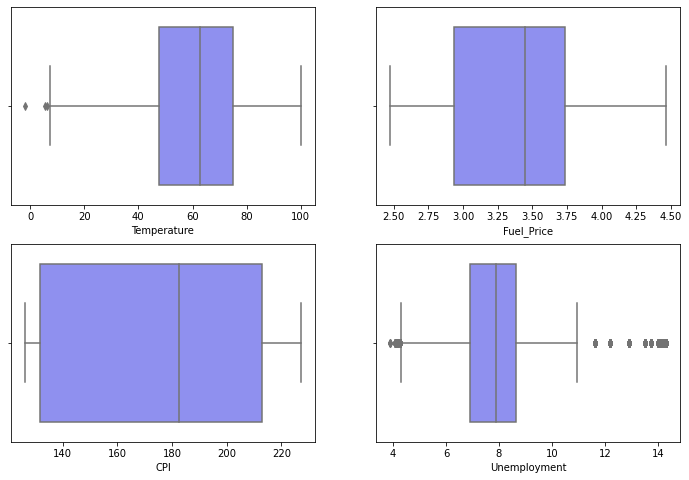

In [5]:
plt.figure(figsize=(12,8))
for i in range(0,len(cont_features)):
    if cont_features[i]!='Weekly_Sales':
        plt.subplot(2,2,i)
        sns.boxplot(data[cont_features[i]],palette="cool_r")

In [6]:
data_outlier_rem=data.copy(deep=True)
for x in cont_features:
    if x!='Weekly_Sales':
        q1=data[x].quantile(0.25)
        q3=data[x].quantile(0.75)
        iqr=q3-q1
        data_outlier_rem=data_outlier_rem[(data_outlier_rem[x]>=q1-1.5*iqr)&(data_outlier_rem[x]<=q3+1.5*iqr)]
        data_outlier_rem.reset_index(drop=True,inplace=True)
data_outlier_rem

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,6
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,7
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,8
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,9
...,...,...,...,...,...,...,...,...,...,...
5946,45,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,39
5947,45,733455.07,0,64.89,3.985,192.170412,8.667,10,2012,40
5948,45,734464.36,0,54.47,4.000,192.327265,8.667,10,2012,41
5949,45,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,42


In [7]:
print(f"Number of data points removed {len(data)-len(data_outlier_rem)}")
print(f"Percentage of points retained = {(len(data_outlier_rem))/len(data) * 100} %")

Number of data points removed 484
Percentage of points retained = 92.47863247863248 %


**log**

In [8]:
data_log_out=data.copy(deep=True)
for i in cont_features:
    data_log_out[i]=np.log(data_log_out[i])
data_log_out.reset_index(drop=True,inplace=True)
data_log_out

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week
0,1,14.312455,0,3.745023,0.944684,5.352315,2.092605,2,2010,5
1,1,14.311400,1,3.650918,0.935309,5.353005,2.092605,2,2010,6
2,1,14.292966,0,3.687128,0.921875,5.353228,2.092605,2,2010,7
3,1,14.158907,0,3.842244,0.940398,5.353372,2.092605,2,2010,8
4,1,14.256862,0,3.839452,0.965081,5.353516,2.092605,3,2010,9
...,...,...,...,...,...,...,...,...,...,...
6430,45,13.477481,0,4.172539,1.385544,5.257566,2.161482,9,2012,39
6431,45,13.505522,0,4.172694,1.382537,5.258383,2.159523,10,2012,40
6432,45,13.506897,0,3.997650,1.386294,5.259198,2.159523,10,2012,41
6433,45,13.484400,0,4.033710,1.378514,5.259217,2.159523,10,2012,42


In [9]:
data_log_out

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week
0,1,14.312455,0,3.745023,0.944684,5.352315,2.092605,2,2010,5
1,1,14.311400,1,3.650918,0.935309,5.353005,2.092605,2,2010,6
2,1,14.292966,0,3.687128,0.921875,5.353228,2.092605,2,2010,7
3,1,14.158907,0,3.842244,0.940398,5.353372,2.092605,2,2010,8
4,1,14.256862,0,3.839452,0.965081,5.353516,2.092605,3,2010,9
...,...,...,...,...,...,...,...,...,...,...
6430,45,13.477481,0,4.172539,1.385544,5.257566,2.161482,9,2012,39
6431,45,13.505522,0,4.172694,1.382537,5.258383,2.159523,10,2012,40
6432,45,13.506897,0,3.997650,1.386294,5.259198,2.159523,10,2012,41
6433,45,13.484400,0,4.033710,1.378514,5.259217,2.159523,10,2012,42


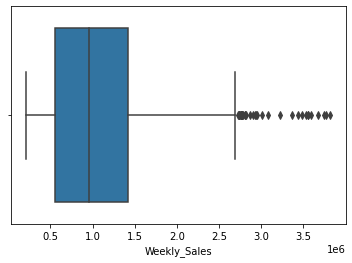

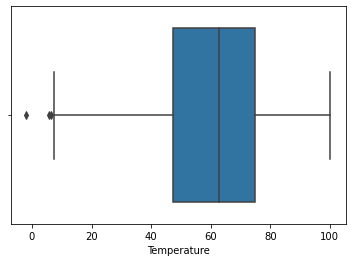

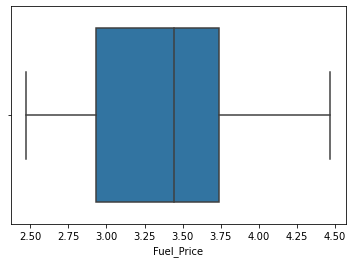

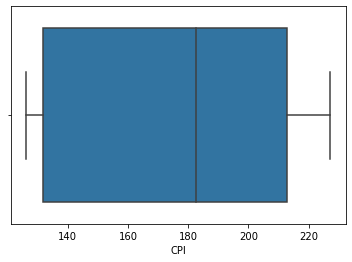

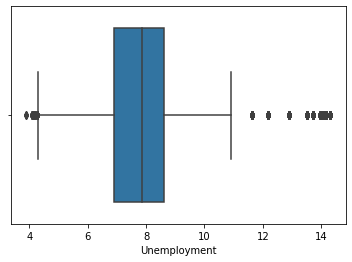

In [10]:
for x in cont_features:
    sns.boxplot(data[x])
    plt.show()

**Taking log is actually increasing the number of outliers**

**box_cox**

In [11]:
import scipy.stats as stats
data_box_cox=data.copy(deep=True)
lambda_list=[]
for x in cont_features:
    if (x!='Weekly_Sales')&(x!='Temperature'):
        data_box_cox[x], fitted_lambda = stats.boxcox(data[x],lmbda=None)  
        lambda_list.append(fitted_lambda)

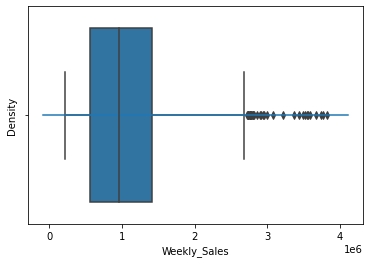

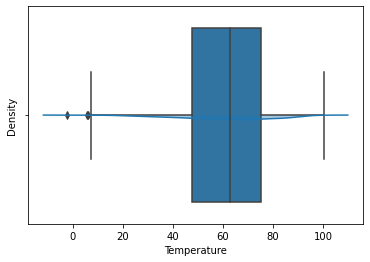

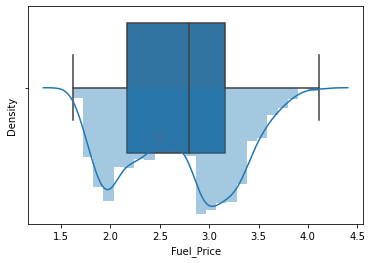

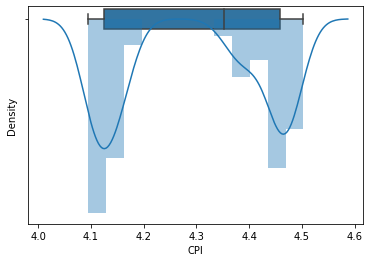

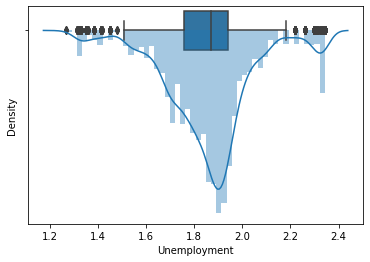

In [12]:
for x in cont_features:
    sns.boxplot(data_box_cox[x])
    sns.distplot(data_box_cox[x])
    plt.show()

**Not quite helpful in removing the outliers,though few variables are normally distributed now and skewness decreased**

In [13]:
data_outlier_rem.skew()

Store           0.031420
Weekly_Sales    0.676428
Holiday_Flag    3.364238
Temperature    -0.343007
Fuel_Price     -0.082282
CPI            -0.088840
Unemployment   -0.100246
Month           0.029054
Year            0.078670
Week            0.041134
dtype: float64

In [14]:
data_log_out.skew()

Store           0.000000
Weekly_Sales   -0.305578
Holiday_Flag    3.373499
Temperature    -1.258571
Fuel_Price     -0.258144
CPI             0.013619
Unemployment    0.099703
Month           0.039568
Year            0.062642
Week            0.051517
dtype: float64

In [15]:
data.skew()

Store           0.000000
Weekly_Sales    0.668362
Holiday_Flag    3.373499
Temperature    -0.336768
Fuel_Price     -0.096158
CPI             0.063492
Unemployment    1.188144
Month           0.039568
Year            0.062642
Week            0.051517
dtype: float64

In [16]:
data_box_cox.skew()

Store           0.000000
Weekly_Sales    0.668362
Holiday_Flag    3.373499
Temperature    -0.336768
Fuel_Price     -0.066126
CPI             0.010268
Unemployment   -0.009650
Month           0.039568
Year            0.062642
Week            0.051517
dtype: float64

**Since month feature is very well captured by week attribute, let us remove the month column**

In [17]:
data_outlier_rem.drop('Month',axis=1,inplace=True)
data_log_out.drop('Month',axis=1,inplace=True)
data_box_cox.drop('Month',axis=1,inplace=True)

**One hot encoding on categorical features**

In [21]:
discrete_features=[x for x in data_outlier_rem.columns if x not in cont_features]

In [22]:
discrete_features

['Store', 'Holiday_Flag', 'Year', 'Week']

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
transformer = make_column_transformer((OneHotEncoder(), discrete_features),remainder='passthrough',verbose_feature_names_out=False)
transformed = transformer.fit_transform(data_outlier_rem).toarray()
transformed_out_rem = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
transformed_out_rem

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Week_48,Week_49,Week_50,Week_51,Week_52,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1643690.90,42.31,2.572,211.096358,8.106
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1641957.44,38.51,2.548,211.242170,8.106
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1611968.17,39.93,2.514,211.289143,8.106
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1409727.59,46.63,2.561,211.319643,8.106
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1554806.68,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,713173.95,64.88,3.997,192.013558,8.684
5947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,733455.07,64.89,3.985,192.170412,8.667
5948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,734464.36,54.47,4.000,192.327265,8.667
5949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,718125.53,56.47,3.969,192.330854,8.667


In [24]:
transformed = transformer.fit_transform(data_log_out).toarray()
transformed_log_out = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
transformed_log_out

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Week_48,Week_49,Week_50,Week_51,Week_52,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.312455,3.745023,0.944684,5.352315,2.092605
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.311400,3.650918,0.935309,5.353005,2.092605
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.292966,3.687128,0.921875,5.353228,2.092605
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.158907,3.842244,0.940398,5.353372,2.092605
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.256862,3.839452,0.965081,5.353516,2.092605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.477481,4.172539,1.385544,5.257566,2.161482
6431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.505522,4.172694,1.382537,5.258383,2.159523
6432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.506897,3.997650,1.386294,5.259198,2.159523
6433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.484400,4.033710,1.378514,5.259217,2.159523


In [25]:
transformed = transformer.fit_transform(data_box_cox).toarray()
transformed_box_cox = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
transformed_box_cox

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Week_48,Week_49,Week_50,Week_51,Week_52,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1643690.90,42.31,1.735701,4.452973,1.892331
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1641957.44,38.51,1.707290,4.453446,1.892331
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1611968.17,39.93,1.667125,4.453598,1.892331
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1409727.59,46.63,1.722674,4.453696,1.892331
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1554806.68,46.50,1.798609,4.453795,1.892331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,713173.95,64.88,3.497663,4.387955,1.948271
6431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,733455.07,64.89,3.482279,4.388518,1.946685
6432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,734464.36,54.47,3.501510,4.389079,1.946685
6433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,718125.53,56.47,3.461781,4.389092,1.946685


In [26]:
transformed_out_rem.to_csv('out_rem.csv')
transformed_log_out.to_csv('log_out.csv')
transformed_box_cox.to_csv('box_cox.csv')